<a href="https://colab.research.google.com/github/carlaseibel/CarlaSeibel/blob/main/EDA_VitiBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Análise de Dados e Levantamentos de Insights VitiBrasil Embrapa

Pós Tech Data Analytics FIAP
- Aluna: Carla Seibel RM350491
- Entrega da Atividade Substitutiva Fase 1

Base de Dados:
http://vitibrasil.cnpuv.embrapa.br/index.php?opcao=opt_01

Objetivos:
Coletar, analisar e visualizar dados da produção de vinhos de mesa, espumantes e sucos de uva longo de todo o período para responder as perguntas de negócio:

1. Qual é o país com maior exportação dos produtos de vinhos de mesa,
espumantes e sucos de uva longo todo o período?
2. Qual é o país com maior importação dos produtos de vinhos de mesa,
espumantes e sucos de uva longo todo o período?
3. Como é a tendência da exportação ao longo dos anos para cada um
dos produtos (vinhos de mesa, espumantes e sucos de uva)?
4. Como é a tendência da importação ao longo dos anos para cada um
dos produtos (vinhos de mesa, espumantes e sucos de uva)?
5. Como é o cenário de produção de vinhos, sucos e derivados no Brasil?
6. Quais são as características do clima favorável para a produção de
vinhos, sucos e derivados?
7. E qual é o valor de exportação dos produtos de vinhos de mesa,
espumantes e sucos de uva para o ano mais recente da base?



Entregas:
- Apresentação com o storytelling e análises;
- Código Python demonstrando toda a criação dos gráficos;
- Utilizar dados externos ao portal da Embrapa para agregar valor à análise.

Etapas:
1. Coleta dos arquivos .csv e estruturar dataframes;
2. Analisar, visualizar e responder perguntas;
3. Extrair bases externas:
   3.1. Definir bases que podem agregar valor: Escolhi dados de População Economicamente Ativa (PEA) dos países com top exportação e importação; Dados de clima das regiões e X (lembrar);
   3.2 Coletar bases e montar DFs;
   3.3 Analisar correlação.
4. Descrever análise com storytelling;
5. Montar relatório utilizando Google Slides





# Importando Libs

In [ ]:
# Importando bibliotecas
import pandas as pd
import os
from pathlib import Path
from typing import Dict, List
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Conectando o Colab com o Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Estruturando DataFrames

In [ ]:
# Configurações para coletar .CSVs no Drive
base_path = '/content/drive/MyDrive/PÓS DATA ANALYTICS /Fase 1 - Data Analysis and Exploration/EDA VitiBrasil'
csv_config_tab = {
    'sep': '\t',
    'encoding': 'utf-8'
}
csv_config_semicolon = {
    'sep': ';',
    'encoding': 'utf-8'
}

# Criando função para carregar arquivos - VERSÃO ADAPTADA
def carrega_multiplos_csvs(base_path: str, filenames: List[str], **kwargs) -> Dict[str, pd.DataFrame]:

    dataframes = {}

    # Lista de arquivos que usam ponto e vírgula como separador
    arquivos_semicolon = ['ImpSuco.csv', 'Producao.csv']

    for filename in filenames:
        filepath = os.path.join(base_path, filename)

        # Usa semicolon para arquivos específicos, tab para os outros
        if filename in arquivos_semicolon:
            dataframes[filename] = pd.read_csv(filepath, **csv_config_semicolon)
            print(f"✓ {filename} carregado com separador ';'")
        else:
            dataframes[filename] = pd.read_csv(filepath, **csv_config_tab)
            print(f"✓ {filename} carregado com separador '\\t'")

    return dataframes

# Carregando os dados em dataframes
filenames = ['ExpVinho.csv', 'ExpSuco.csv', 'ExpEspumantes.csv', 'ImpVinhos.csv', 'ImpSuco.csv', 'ImpEspumantes.csv', 'Producao.csv']
datasets = carrega_multiplos_csvs(base_path, filenames)

# Extraindo os DataFrames
df_exp_vinho = datasets.get('ExpVinho.csv')
df_exp_suco = datasets.get('ExpSuco.csv')
df_exp_espumantes = datasets.get('ExpEspumantes.csv')
df_imp_vinho = datasets.get('ImpVinhos.csv')
df_imp_suco = datasets.get('ImpSuco.csv')
df_imp_espumantes = datasets.get('ImpEspumantes.csv')
df_producao = datasets.get('Producao.csv')

print(df_exp_vinho)
print(df_exp_suco)
print(df_exp_espumantes)
print(df_imp_vinho)
print(df_imp_suco)
print(df_imp_espumantes)
print(df_producao)

✓ ExpVinho.csv carregado com separador '\t'
✓ ExpSuco.csv carregado com separador '\t'
✓ ExpEspumantes.csv carregado com separador '\t'
✓ ImpVinhos.csv carregado com separador '\t'
✓ ImpSuco.csv carregado com separador ';'
✓ ImpEspumantes.csv carregado com separador '\t'
✓ Producao.csv carregado com separador ';'
      Id                             País  1970  1970.1  1971  1971.1  1972  \
0      1                      Afeganistão     0       0     0       0     0   
1      2                    África do Sul     0       0     0       0     0   
2      3  Alemanha, República Democrática     0       0     0       0  4168   
3      4                           Angola     0       0     0       0     0   
4      5                         Anguilla     0       0     0       0     0   
..   ...                              ...   ...     ...   ...     ...   ...   
136  137                           Tuvalu     0       0     0       0     0   
137  138                          Uruguai     0      

In [ ]:
df_exp_vinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Columns: 112 entries, Id to 2024.1
dtypes: int64(111), object(1)
memory usage: 123.5+ KB


In [ ]:
df_exp_vinho.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,Afeganistão,0,0,0,0,0,0,0,0,...,0,0,11,46,0,0,0,0,0,0
1,2,África do Sul,0,0,0,0,0,0,0,0,...,4,21,0,0,0,0,117,698,103,1783
2,3,"Alemanha, República Democrática",0,0,0,0,4168,2630,12000,8250,...,6261,32605,2698,6741,7630,45367,4806,31853,6666,48095
3,4,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,4068,4761,0,0,0,0
4,5,Anguilla,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Os dados tabulados na origem estão no formato *wide*  - com os anos em colunas - e com as informações de quantidade e valores nas colunas de anos. Vamos renomear as colunas e normalizar usando a função Melt para facilitar análises e visualizações gráficas.

De acordo com o site da VitiBrasil, os anos à esquerda representam a quantidade (Kg) e os anos à direita representam valores (US$).

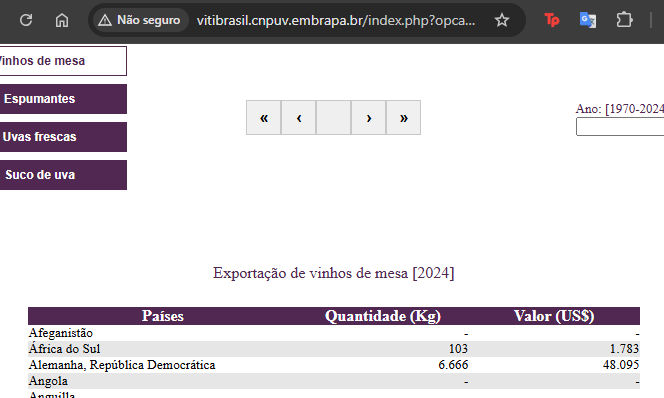

In [ ]:
# Separar colunas de quantidade e valor
colunas_qtd = [col for col in df_exp_vinho.columns if not str(col).endswith('.1') and col not in ['Id', 'País']]
colunas_val = [col for col in df_exp_vinho.columns if str(col).endswith('.1')]

# Definir coluna com os anos
anos = colunas_qtd  # Não possuem o '.1'

# Normalizar data frame com Melt
df_exp_vinho_qtd = df_exp_vinho.melt(id_vars=['Id', 'País'], value_vars=colunas_qtd,
                 var_name='Ano', value_name='Quantidade')

df_exp_vinho_val = df_exp_vinho.melt(id_vars=['Id', 'País'], value_vars=colunas_val,
                 var_name='Ano', value_name='Valor')

# Remover o ".1" das colunas de valor para alinhar com quantidade
df_exp_vinho_val['Ano'] = df_exp_vinho_val['Ano'].astype(str).str.replace('.1', '', regex=False)

# Juntar quantidade e valor
df_exp_vinho_final = pd.merge(df_exp_vinho_qtd, df_exp_vinho_val, on=['Id', 'País', 'Ano'])

# Converter coluna Ano para int
df_exp_vinho_final['Ano'] = df_exp_vinho_final['Ano'].astype(int)

df_exp_vinho_final.head()

,Id,País,Ano,Quantidade,Valor
0,1,Afeganistão,1970,0,0
1,2,África do Sul,1970,0,0
2,3,"Alemanha, República Democrática",1970,0,0
3,4,Angola,1970,0,0
4,5,Anguilla,1970,0,0


Estruturando os dataframes dos demais produtos de Exportação.

In [ ]:
df_exp_espumantes.head()

,Id,País,1970,1970.1,1971,1971.1,1972,1972.1,1973,1973.1,...,2020,2020.1,2021,2021.1,2022,2022.1,2023,2023.1,2024,2024.1
0,1,África do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,44,78,1353
1,2,Alemanha,0,0,0,0,0,0,0,0,...,2388,14767,142,265,1164,6560,162,1542,22542,77981
2,3,Angola,0,0,0,0,0,0,0,0,...,24,38,0,0,26383,141588,56242,315073,0,0
3,4,Antigua e Barbuda,0,0,0,0,0,0,0,0,...,32,328,10,82,65,146,24,100,23,100
4,5,Antilhas Holandesas,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Separar colunas de quantidade e valor
colunas_qtd = [col for col in df_exp_espumantes.columns if not str(col).endswith('.1') and col not in ['Id', 'País']]
colunas_val = [col for col in df_exp_espumantes.columns if str(col).endswith('.1')]

# Definir coluna com os anos
anos = colunas_qtd  # Não possuem o '.1'

# Normalizar data frame com Melt
df_exp_espumantes_qtd = df_exp_espumantes.melt(id_vars=['Id', 'País'], value_vars=colunas_qtd,
                 var_name='Ano', value_name='Quantidade')

df_exp_espumantes_val = df_exp_espumantes.melt(id_vars=['Id', 'País'], value_vars=colunas_val,
                 var_name='Ano', value_name='Valor')

# Remover o ".1" das colunas de valor para alinhar com quantidade
df_exp_espumantes_val['Ano'] = df_exp_espumantes_val['Ano'].astype(str).str.replace('.1', '', regex=False)

# Juntar quantidade e valor
df_exp_espumantes_final = pd.merge(df_exp_espumantes_qtd, df_exp_espumantes_val, on=['Id', 'País', 'Ano'])

# Converter coluna Ano para int
df_exp_espumantes_final['Ano'] = df_exp_espumantes_final['Ano'].astype(int)

df_exp_espumantes_final.head()

,Id,País,Ano,Quantidade,Valor
0,1,África do Sul,1970,0,0
1,2,Alemanha,1970,0,0
2,3,Angola,1970,0,0
3,4,Antigua e Barbuda,1970,0,0
4,5,Antilhas Holandesas,1970,0,0


In [ ]:
# Separar colunas de quantidade e valor
colunas_qtd = [col for col in df_exp_suco.columns if not str(col).endswith('.1') and col not in ['Id', 'País']]
colunas_val = [col for col in df_exp_suco.columns if str(col).endswith('.1')]

# Definir coluna com os anos
anos = colunas_qtd  # Não possuem o '.1'

# Normalizar data frame com Melt
df_exp_suco_qtd = df_exp_suco.melt(id_vars=['Id', 'País'], value_vars=colunas_qtd,
                 var_name='Ano', value_name='Quantidade')

df_exp_suco_val = df_exp_suco.melt(id_vars=['Id', 'País'], value_vars=colunas_val,
                 var_name='Ano', value_name='Valor')

# Remover o ".1" das colunas de valor para alinhar com quantidade
df_exp_suco_val['Ano'] = df_exp_suco_val['Ano'].astype(str).str.replace('.1', '', regex=False)

# Juntar quantidade e valor
df_exp_suco_final = pd.merge(df_exp_suco_qtd, df_exp_suco_val, on=['Id', 'País', 'Ano'])

# Converter coluna Ano para int
df_exp_suco_final['Ano'] = df_exp_suco_final['Ano'].astype(int)

df_exp_suco_final.head()

,Id,País,Ano,Quantidade,Valor
0,1,África do Sul,1970,0,0
1,2,"Alemanha, República Democrática da",1970,0,0
2,3,Angola,1970,0,0
3,4,Antígua e Barbuda,1970,0,0
4,5,Antilhas Holandesas,1970,0,0


Agora estruturando os DFs de Importações.

In [ ]:
# Separar colunas de quantidade e valor
colunas_qtd = [col for col in df_imp_vinho.columns if not str(col).endswith('.1') and col not in ['Id', 'País']]
colunas_val = [col for col in df_imp_vinho.columns if str(col).endswith('.1')]

# Definir coluna com os anos
anos = colunas_qtd  # Não possuem o '.1'

# Normalizar data frame com Melt
df_imp_vinho_qtd = df_imp_vinho.melt(id_vars=['Id', 'País'], value_vars=colunas_qtd,
                 var_name='Ano', value_name='Quantidade')

df_imp_vinho_val = df_imp_vinho.melt(id_vars=['Id', 'País'], value_vars=colunas_val,
                 var_name='Ano', value_name='Valor')

# Remover o ".1" das colunas de valor para alinhar com quantidade
df_imp_vinho_val['Ano'] = df_imp_vinho_val['Ano'].astype(str).str.replace('.1', '', regex=False)

# Juntar quantidade e valor
df_imp_vinho_final = pd.merge(df_imp_vinho_qtd, df_imp_vinho_val, on=['Id', 'País', 'Ano'])

# Converter coluna Ano para int
df_imp_vinho_final['Ano'] = df_exp_vinho_final['Ano'].astype(int)

df_imp_vinho_final.head()

,Id,País,Ano,Quantidade,Valor
0,1,Africa do Sul,1970,0,0
1,2,Alemanha,1970,52297,30498
2,3,Argélia,1970,0,0
3,4,Arábia Saudita,1970,0,0
4,5,Argentina,1970,19525,12260


In [ ]:
# Separar colunas de quantidade e valor
colunas_qtd = [col for col in df_imp_espumantes.columns if not str(col).endswith('.1') and col not in ['Id', 'País']]
colunas_val = [col for col in df_imp_espumantes.columns if str(col).endswith('.1')]

# Definir coluna com os anos
anos = colunas_qtd  # Não possuem o '.1'

# Normalizar data frame com Melt
df_imp_espumantes_qtd = df_imp_espumantes.melt(id_vars=['Id', 'País'], value_vars=colunas_qtd,
                 var_name='Ano', value_name='Quantidade')

df_imp_espumantes_val = df_imp_espumantes.melt(id_vars=['Id', 'País'], value_vars=colunas_val,
                 var_name='Ano', value_name='Valor')

# Remover o ".1" das colunas de valor para alinhar com quantidade
df_imp_espumantes_val['Ano'] = df_imp_espumantes_val['Ano'].astype(str).str.replace('.1', '', regex=False)

# Juntar quantidade e valor
df_imp_espumantes_final = pd.merge(df_imp_espumantes_qtd, df_imp_espumantes_val, on=['Id', 'País', 'Ano'])

# Converter coluna Ano para int
df_imp_espumantes_final['Ano'] = df_imp_espumantes_final['Ano'].astype(int)

df_imp_espumantes_final.head()

,Id,País,Ano,Quantidade,Valor
0,1,Africa do Sul,1970,0,0
1,2,Alemanha,1970,0,0
2,3,Argentina,1970,4980,3836
3,4,Austrália,1970,0,0
4,5,Áustria,1970,0,0


In [ ]:
# Separar colunas de quantidade e valor
colunas_qtd = [col for col in df_imp_suco.columns if not str(col).endswith('.1') and col not in ['Id', 'País']]
colunas_val = [col for col in df_imp_suco.columns if str(col).endswith('.1')]

# Definir coluna com os anos
anos = colunas_qtd  # Não possuem o '.1'

# Normalizar data frame com Melt
df_imp_suco_qtd = df_imp_suco.melt(id_vars=['Id', 'País'], value_vars=colunas_qtd,
                 var_name='Ano', value_name='Quantidade')

df_imp_suco_val = df_imp_suco.melt(id_vars=['Id', 'País'], value_vars=colunas_val,
                 var_name='Ano', value_name='Valor')

# Remover o ".1" das colunas de valor para alinhar com quantidade
df_imp_suco_val['Ano'] = df_imp_suco_val['Ano'].astype(str).str.replace('.1', '', regex=False)

# Juntar quantidade e valor
df_imp_suco_final = pd.merge(df_imp_suco_qtd, df_imp_suco_val, on=['Id', 'País', 'Ano'])

# Converter coluna Ano para int
df_imp_suco_final['Ano'] = df_exp_suco_final['Ano'].astype(int)

df_imp_suco_final.head()

,Id,País,Ano,Quantidade,Valor
0,1,Africa do Sul,1970,0,0
1,2,Alemanha,1970,0,0
2,3,Argentina,1970,0,0
3,4,Austria,1970,0,0
4,5,Canadá,1970,0,0


# Análise das Exportações

Agora, vamos plotar os gráficos para entender quem são os países que mais exportaram os produtos:

1. Vinhos de mesa
2. Espumantes
3. Suco de uva


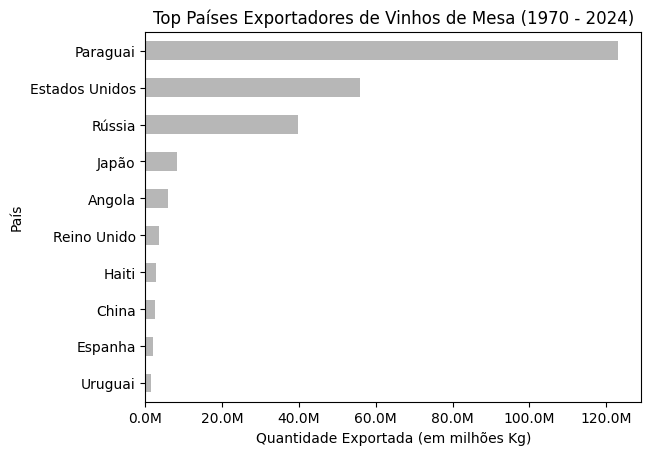

In [ ]:
# Agrupando top 10 na qtd total exportada ao longo do tempo
top_paises_exp_vinho = df_exp_vinho_final.groupby('País')['Quantidade'].sum().sort_values(ascending=False).head(10)
top_paises_exp_espumantes = df_exp_espumantes_final.groupby('País')['Quantidade'].sum().sort_values(ascending=False).head(10)
top_paises_exp_suco = df_exp_suco_final.groupby('País')['Quantidade'].sum().sort_values(ascending=False).head(10)


# Criando o gráfico
fig, ax = plt.subplots()
top_paises_exp_vinho.sort_values(ascending=True).plot(kind='barh', color='#b7b7b7ff', ax=ax)
plt.title("Top Países Exportadores de Vinhos de Mesa (1970 - 2024)")
ax.set_xlabel("Quantidade Exportada (em milhões Kg)")
ax.set_ylabel("País")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))


plt.show()



Para evitar que o código fique repetitivo, criaremos uma função apra plotar os maiores exportadores de vinho filtrando por tipo de produto (vinho, espumante ou suco) e métrica considerada (quantidade ou valor).

In [ ]:
def plot_top_paises_exp(df, coluna_pais='País', coluna_metrica='Quantidade',
                                 tipo_metrica='quantidade',
                                 titulo="Top Países Exportadores",
                                 xlabel=None,
                                 ylabel="País",
                                 cor='#b7b7b7ff',
                                 top_n=3,
                                 figsize=(6, 3),
                                 formato_eixo='auto'):


    # Define xlabel automaticamente se não fornecido
    if xlabel is None:
        if tipo_metrica == 'quantidade':
            xlabel = "Quantidade Exportada (em milhões L)"
        elif tipo_metrica == 'valor':
            xlabel = "Valor Exportado (em milhões US$)"
        else:
            xlabel = f"{coluna_metrica}"

    # Define formato do eixo automaticamente se 'auto'
    if formato_eixo == 'auto':
        if tipo_metrica == 'quantidade':
            formato_eixo = 'milhoes'
        elif tipo_metrica == 'valor':
            formato_eixo = 'milhoes'
        else:
            formato_eixo = 'normal'

    # Agrupando por país e ordenando pelo top
    top_paises = df.groupby(coluna_pais)[coluna_metrica].sum().sort_values(ascending=False).head(top_n)

    # Cria o gráfico
    fig, ax = plt.subplots(figsize=figsize)
    top_paises.sort_values(ascending=True).plot(kind='barh', color=cor, ax=ax)

    # Configurações do gráfico
    plt.title(titulo, fontsize=14, fontweight='bold')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Formatar eixo X
    if formato_eixo == 'milhoes':
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))
    elif formato_eixo == 'milhares':
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-3:.1f}K'))
    elif formato_eixo == 'bilhoes':
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-9:.1f}B'))

    # Ajusta o layout
    plt.tight_layout()

    return fig, ax

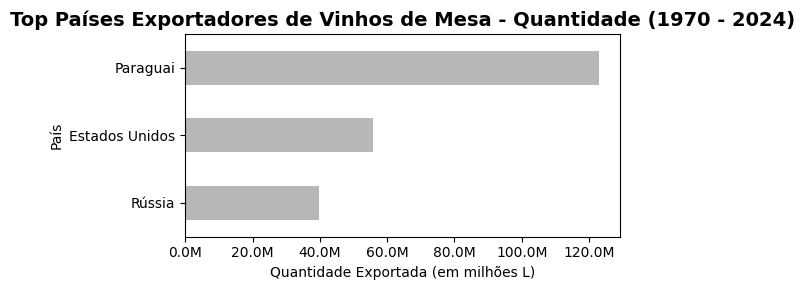

In [ ]:
# Plotando para Vinhos pela quantidade
fig1, ax1 = plot_top_paises_exp(
    df_exp_vinho_final,
    coluna_metrica='Quantidade',
    tipo_metrica='quantidade',
    titulo="Top Países Exportadores de Vinhos de Mesa - Quantidade (1970 - 2024)",
    cor='#b7b7b7ff'
)
plt.show()

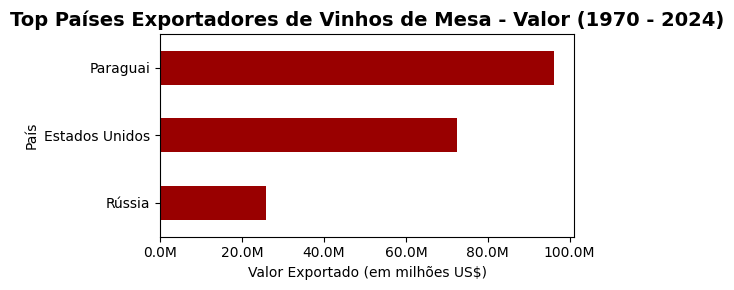

In [ ]:
# Plotando para Vinhos pelo valor
fig2, ax2 = plot_top_paises_exp(
    df_exp_vinho_final,
    coluna_metrica='Valor',
    tipo_metrica='valor',
    titulo="Top Países Exportadores de Vinhos de Mesa - Valor (1970 - 2024)",
    cor='#990000'
)
plt.show()

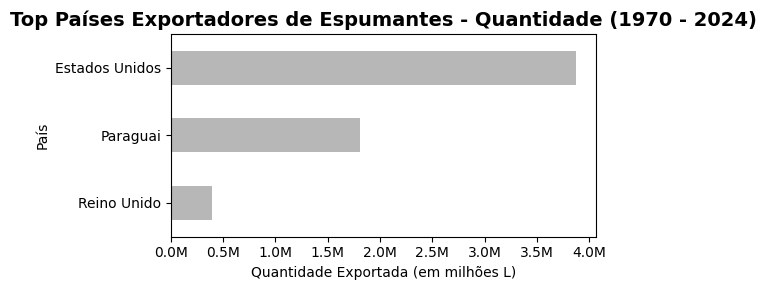

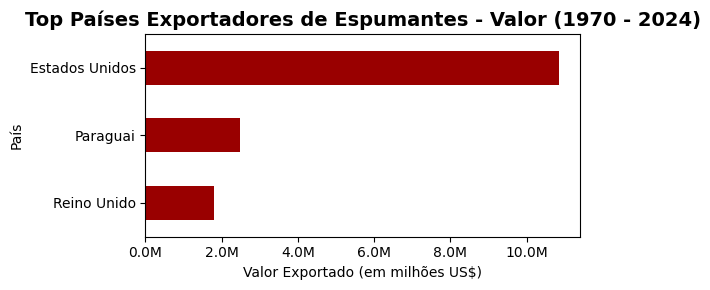

In [ ]:
# Plotando para Espumantes pela quantidade
fig1, ax1 = plot_top_paises_exp(
    df_exp_espumantes_final,
    coluna_metrica='Quantidade',
    tipo_metrica='quantidade',
    titulo="Top Países Exportadores de Espumantes - Quantidade (1970 - 2024)",
    cor='#b7b7b7ff'
)
plt.show()

# Plotando para Espumantes pelo valor
fig2, ax2 = plot_top_paises_exp(
    df_exp_espumantes_final,
    coluna_metrica='Valor',
    tipo_metrica='valor',
    titulo="Top Países Exportadores de Espumantes - Valor (1970 - 2024)",
    cor='#990000'
)
plt.show()

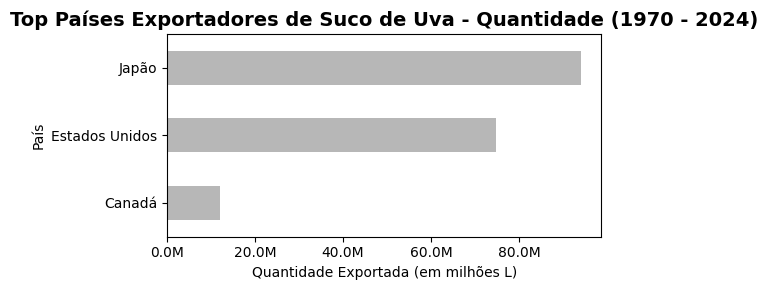

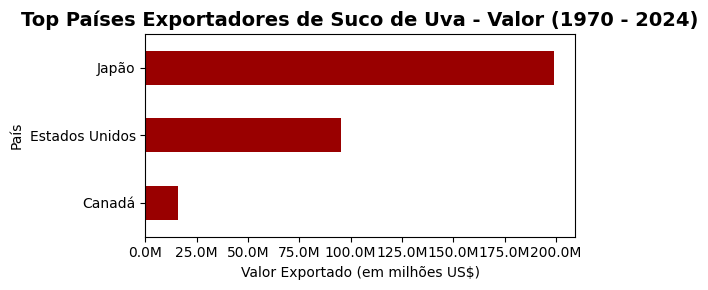

In [ ]:
# Plotando para Suco pela quantidade
fig1, ax1 = plot_top_paises_exp(
    df_exp_suco_final,
    coluna_metrica='Quantidade',
    tipo_metrica='quantidade',
    titulo="Top Países Exportadores de Suco de Uva - Quantidade (1970 - 2024)",
    cor='#b7b7b7ff'
)
plt.show()

# Plotando para Suco pelo valor
fig2, ax2 = plot_top_paises_exp(
    df_exp_suco_final,
    coluna_metrica='Valor',
    tipo_metrica='valor',
    titulo="Top Países Exportadores de Suco de Uva - Valor (1970 - 2024)",
    cor='#990000'
)
plt.show()

#Análise das Importações

In [ ]:
def plot_top_paises_imp(df, coluna_pais='País', coluna_metrica='Quantidade',
                                 tipo_metrica='quantidade',
                                 titulo="Top Países Importadores",
                                 xlabel=None,
                                 ylabel="País",
                                 cor='#b7b7b7ff',
                                 top_n=3,
                                 figsize=(6, 3),
                                 formato_eixo='auto'):


    # Define xlabel automaticamente se não fornecido
    if xlabel is None:
        if tipo_metrica == 'quantidade':
            xlabel = "Quantidade Importada (em milhões Kg)"
        elif tipo_metrica == 'valor':
            xlabel = "Valor Importado (em milhões US$)"
        else:
            xlabel = f"{coluna_metrica}"

    # Define formato do eixo automaticamente se 'auto'
    if formato_eixo == 'auto':
        if tipo_metrica == 'quantidade':
            formato_eixo = 'milhoes'
        elif tipo_metrica == 'valor':
            formato_eixo = 'milhoes'
        else:
            formato_eixo = 'normal'

    # Agrupando por país e ordenando pelo top
    top_paises = df.groupby(coluna_pais)[coluna_metrica].sum().sort_values(ascending=False).head(top_n)

    # Cria o gráfico
    fig, ax = plt.subplots(figsize=figsize)
    top_paises.sort_values(ascending=True).plot(kind='barh', color=cor, ax=ax)

    # Configurações do gráfico
    plt.title(titulo, fontsize=14, fontweight='bold')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Formatar eixo X
    if formato_eixo == 'milhoes':
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))
    elif formato_eixo == 'milhares':
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-3:.1f}K'))
    elif formato_eixo == 'bilhoes':
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-9:.1f}B'))

    # Ajusta o layout
    plt.tight_layout()

    return fig, ax

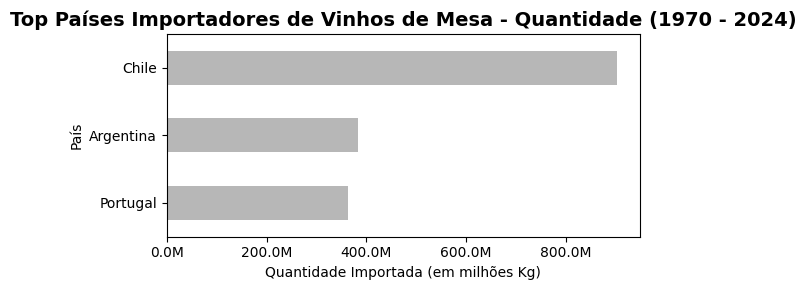

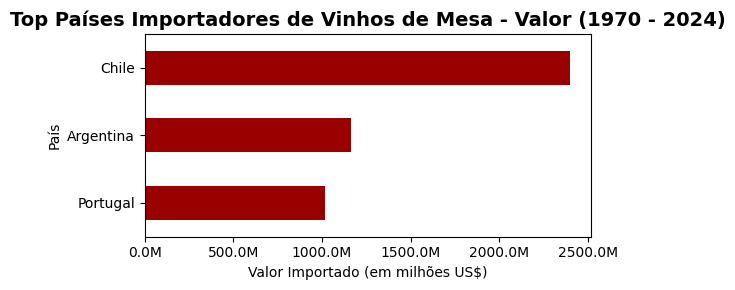

In [ ]:
# Plotando Importações de Vinho Suco pela quantidade
fig1, ax1 = plot_top_paises_imp(
    df_imp_vinho_final,
    coluna_metrica='Quantidade',
    tipo_metrica='quantidade',
    titulo="Top Países Importadores de Vinhos de Mesa - Quantidade (1970 - 2024)"
)
plt.show()

# Plotando para Suco pelo valor
fig2, ax2 = plot_top_paises_imp(
    df_imp_vinho_final,
    coluna_metrica='Valor',
    tipo_metrica='valor',
    titulo="Top Países Importadores de Vinhos de Mesa - Valor (1970 - 2024)",
    cor='#990000'
)
plt.show()

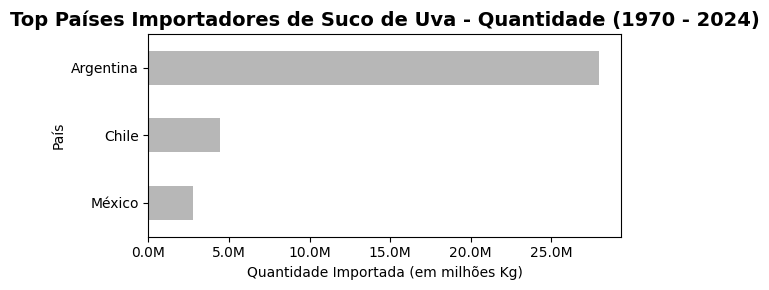

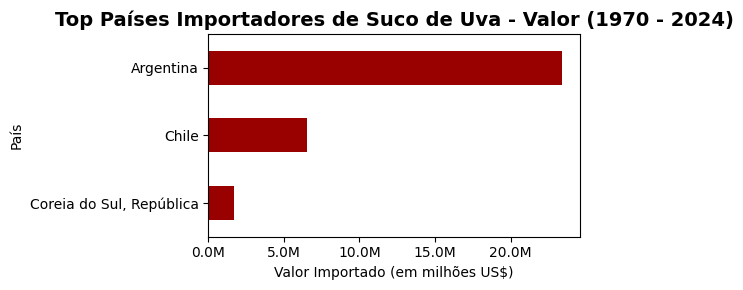

In [ ]:
# Plotando Importações de Suco pela quantidade
fig1, ax1 = plot_top_paises_imp(
    df_imp_suco_final,
    coluna_metrica='Quantidade',
    tipo_metrica='quantidade',
    titulo="Top Países Importadores de Suco de Uva - Quantidade (1970 - 2024)"
)
plt.show()

# Plotando para Suco pelo valor
fig2, ax2 = plot_top_paises_imp(
    df_imp_suco_final,
    coluna_metrica='Valor',
    tipo_metrica='valor',
    titulo="Top Países Importadores de Suco de Uva - Valor (1970 - 2024)",
    cor='#990000'
)
plt.show()

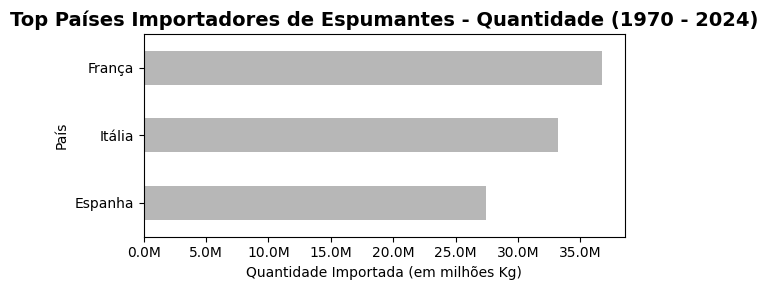

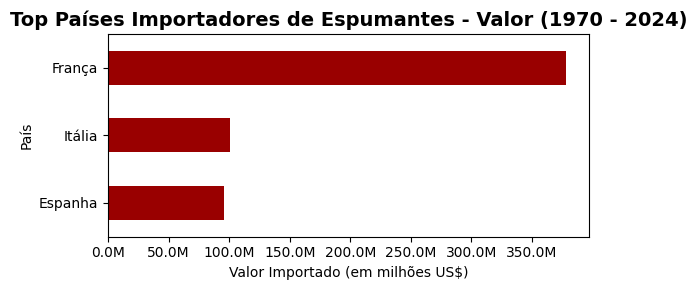

In [ ]:
# Plotando para Espumantes pela quantidade
fig1, ax1 = plot_top_paises_imp(
    df_imp_espumantes_final,
    coluna_metrica='Quantidade',
    tipo_metrica='quantidade',
    titulo="Top Países Importadores de Espumantes - Quantidade (1970 - 2024)"
)
plt.show()

# Plotando para Espumantes pelo valor
fig2, ax2 = plot_top_paises_imp(
    df_imp_espumantes_final,
    coluna_metrica='Valor',
    tipo_metrica='valor',
    titulo="Top Países Importadores de Espumantes - Valor (1970 - 2024)",
    cor='#990000'
)
plt.show()

#Análise de Tendências

In [ ]:
def plotar_tendencia_temporal(dfs_dict, coluna_tempo='Ano', coluna_metrica='Quantidade',
                             tipo_metrica='quantidade', tipo_operacao='importacao',
                             figsize=(12, 8)):
    """
    Plota tendência temporal de múltiplos produtos
    """

    # Cores e estilos
    cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    estilos = ['-', '--', '-.', ':', '-']

    # Configurar labels
    if tipo_metrica == 'quantidade':
        ylabel = "Quantidade (milhões Kg)"
        formato_func = lambda x, _: f'{x/1e6:.1f}M'
    elif tipo_metrica == 'valor':
        ylabel = "Valor (milhões US$)"
        formato_func = lambda x, _: f'{x/1e6:.1f}M'
    else:
        ylabel = coluna_metrica
        formato_func = lambda x, _: f'{x:.0f}'

    # Título
    if tipo_operacao == 'importacao':
        titulo = "Tendência de Importação por Produto (1970-2024)"
    else:
        titulo = "Tendência de Exportação por Produto (1970-2024)"

    # Criar gráfico
    fig, ax = plt.subplots(figsize=figsize)

    # Plotar cada produto
    for i, (produto, df) in enumerate(dfs_dict.items()):
        # Agrupar por ano e somar valores
        df_agrupado = df.groupby(coluna_tempo)[coluna_metrica].sum().reset_index()

        # Plotar linha
        ax.plot(df_agrupado[coluna_tempo], df_agrupado[coluna_metrica],
               label=produto,
               color=cores[i % len(cores)],
               linestyle=estilos[i % len(estilos)],
               linewidth=2,
               marker='o',
               markersize=4)

    # Configurar gráfico
    ax.set_title(titulo, fontsize=16, fontweight='bold')
    ax.set_xlabel("Ano", fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(formato_func))
    ax.set_ylim(bottom=0)

    plt.tight_layout()
    return fig, ax


def plotar_comparacao_imp_exp(df_exp_dict, df_imp_dict, coluna_metrica='Quantidade',
                             tipo_metrica='quantidade', produto_foco=None):


    if produto_foco is None:
        produtos = list(df_exp_dict.keys())
    elif isinstance(produto_foco, str):
        produtos = [produto_foco]
    else:
        produtos = produto_foco

    n_produtos = len(produtos)
    fig, axes = plt.subplots(n_produtos, 1, figsize=(14, 6*n_produtos))

    if n_produtos == 1:
        axes = [axes]

    # Define ylabel baseado no tipo de métrica
    if tipo_metrica == 'quantidade':
        ylabel = "Quantidade (milhões Kg)"
        formato_func = lambda x, _: f'{x*1e-6:.1f}M'
    elif tipo_metrica == 'valor':
        ylabel = "Valor (milhões US$)"
        formato_func = lambda x, _: f'{x*1e-6:.1f}M'
    else:
        ylabel = coluna_metrica
        formato_func = lambda x, _: f'{x:.0f}'

    for i, produto in enumerate(produtos):
        ax = axes[i]

        # Dados de exportação
        if produto in df_exp_dict:
            df_exp = df_exp_dict[produto].groupby('Ano')[coluna_metrica].sum().reset_index()
            ax.plot(df_exp['Ano'], df_exp[coluna_metrica],
                   label=f'{produto} - Exportação', color='green',
                   linestyle='-', linewidth=2, marker='o', markersize=4)

        # Dados de importação
        if produto in df_imp_dict:
            df_imp = df_imp_dict[produto].groupby('Ano')[coluna_metrica].sum().reset_index()
            ax.plot(df_imp['Ano'], df_imp[coluna_metrica],
                   label=f'{produto} - Importação', color='red',
                   linestyle='--', linewidth=2, marker='s', markersize=4)

        # Configurações
        ax.set_title(f"Importação vs Exportação - {produto} (1970-2024)",
                    fontsize=14, fontweight='bold')
        ax.set_xlabel("Ano")
        ax.set_ylabel(ylabel)
        ax.legend(loc='best')
        ax.grid(True, alpha=0.3)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(formato_func))

    plt.tight_layout()
    return fig, axes



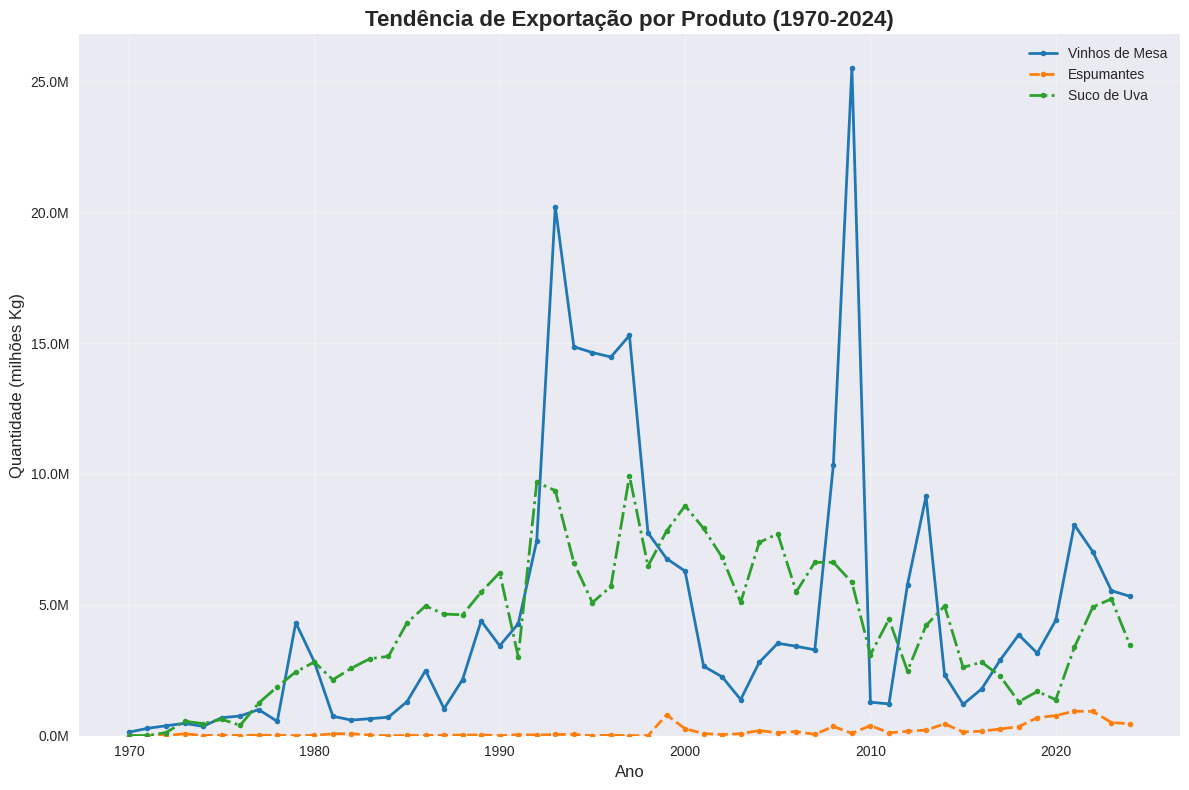

In [ ]:
dfs_exportacao = {
    'Vinhos de Mesa': df_exp_vinho_final,
    'Espumantes': df_exp_espumantes_final,
    'Suco de Uva': df_exp_suco_final
}

fig1, ax1 = plotar_tendencia_temporal(
    dfs_exportacao,
    coluna_metrica='Quantidade',
    tipo_metrica='quantidade',
    tipo_operacao='exportacao'
)
plt.show()

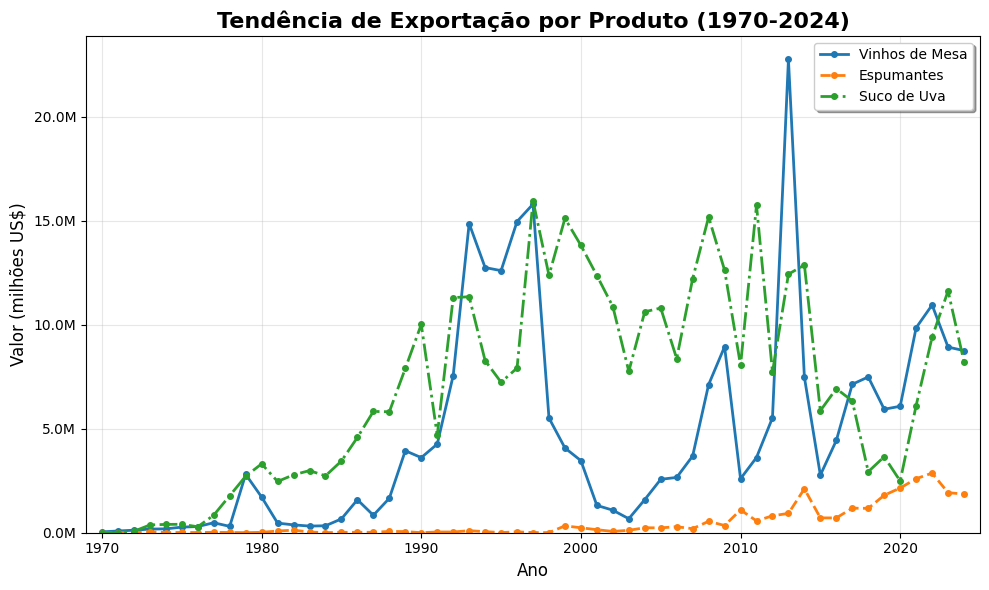

In [ ]:
# Tendência de exportação por valor
fig2, ax2 = plotar_tendencia_temporal(
    dfs_exportacao,
    coluna_metrica='Valor',
    tipo_metrica='valor',
    tipo_operacao='exportacao'
)
plt.show()

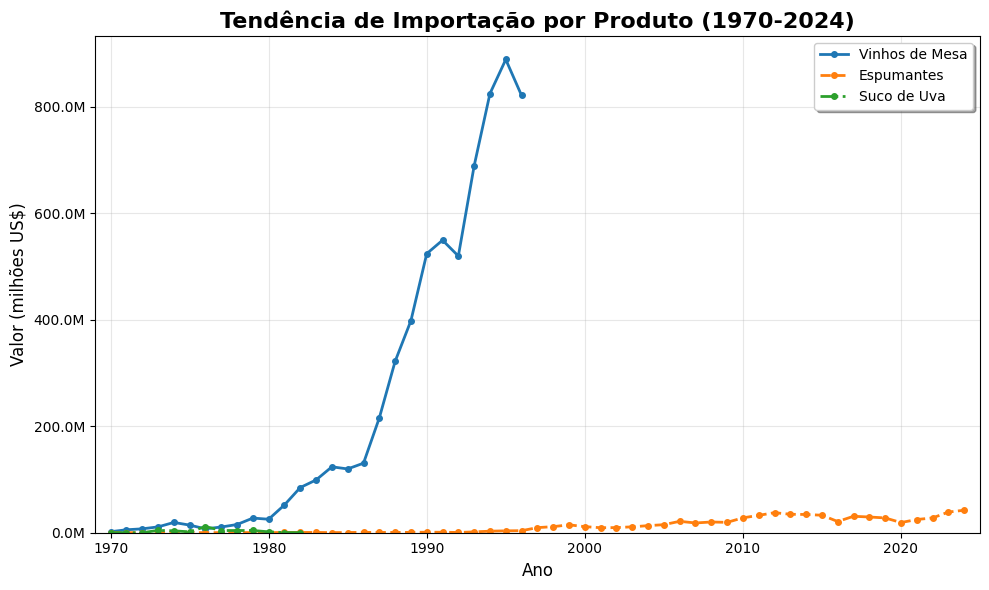

In [ ]:
# Tendência de exportação por valor
dfs_importacao = {
    'Vinhos de Mesa': df_imp_vinho_final,
    'Espumantes': df_imp_espumantes_final,
    'Suco de Uva': df_imp_suco_final
}

fig1, ax1 = plotar_tendencia_temporal(
    dfs_importacao,
    coluna_metrica='Valor',
    tipo_metrica='valor',
    tipo_operacao='importacao'
)
plt.tight_layout()
plt.show()


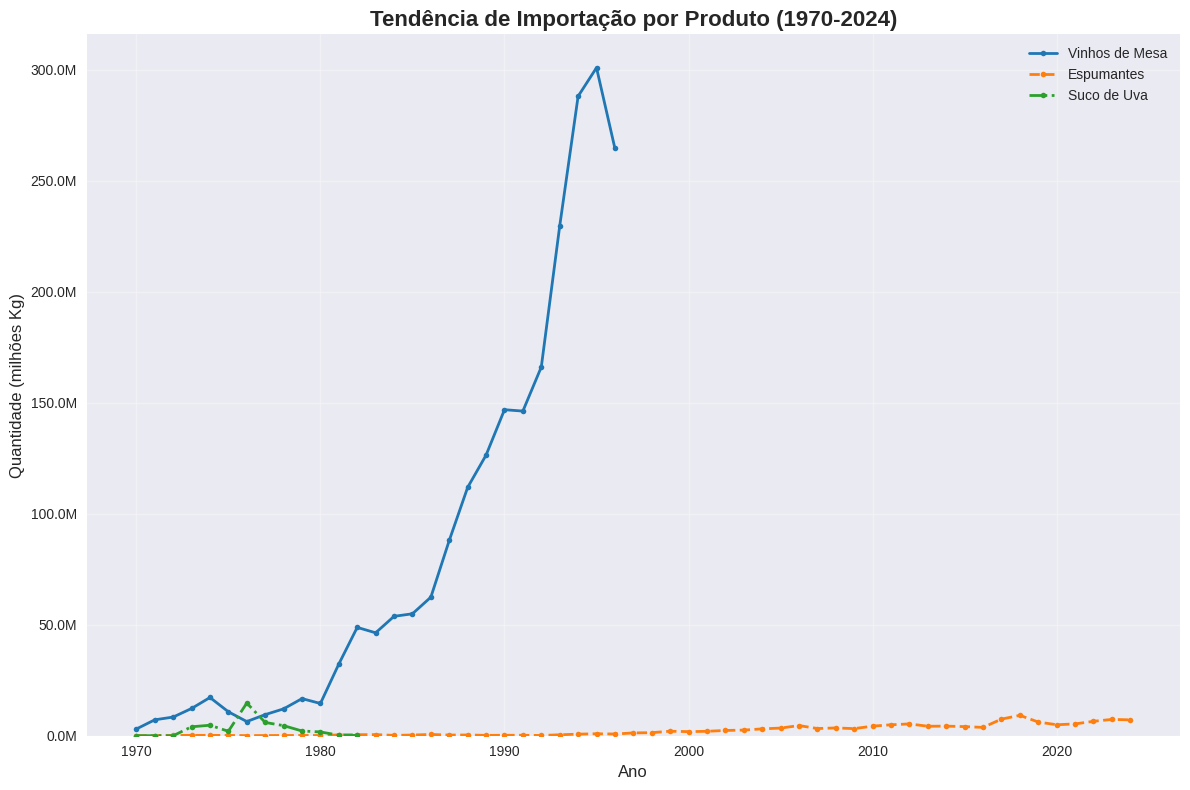

In [ ]:
# Tendência de importação por quantidade
fig2, ax2 = plotar_tendencia_temporal(
    dfs_importacao,
    coluna_metrica='Quantidade',
    tipo_metrica='quantidade',
    tipo_operacao='importacao'
)
plt.show()

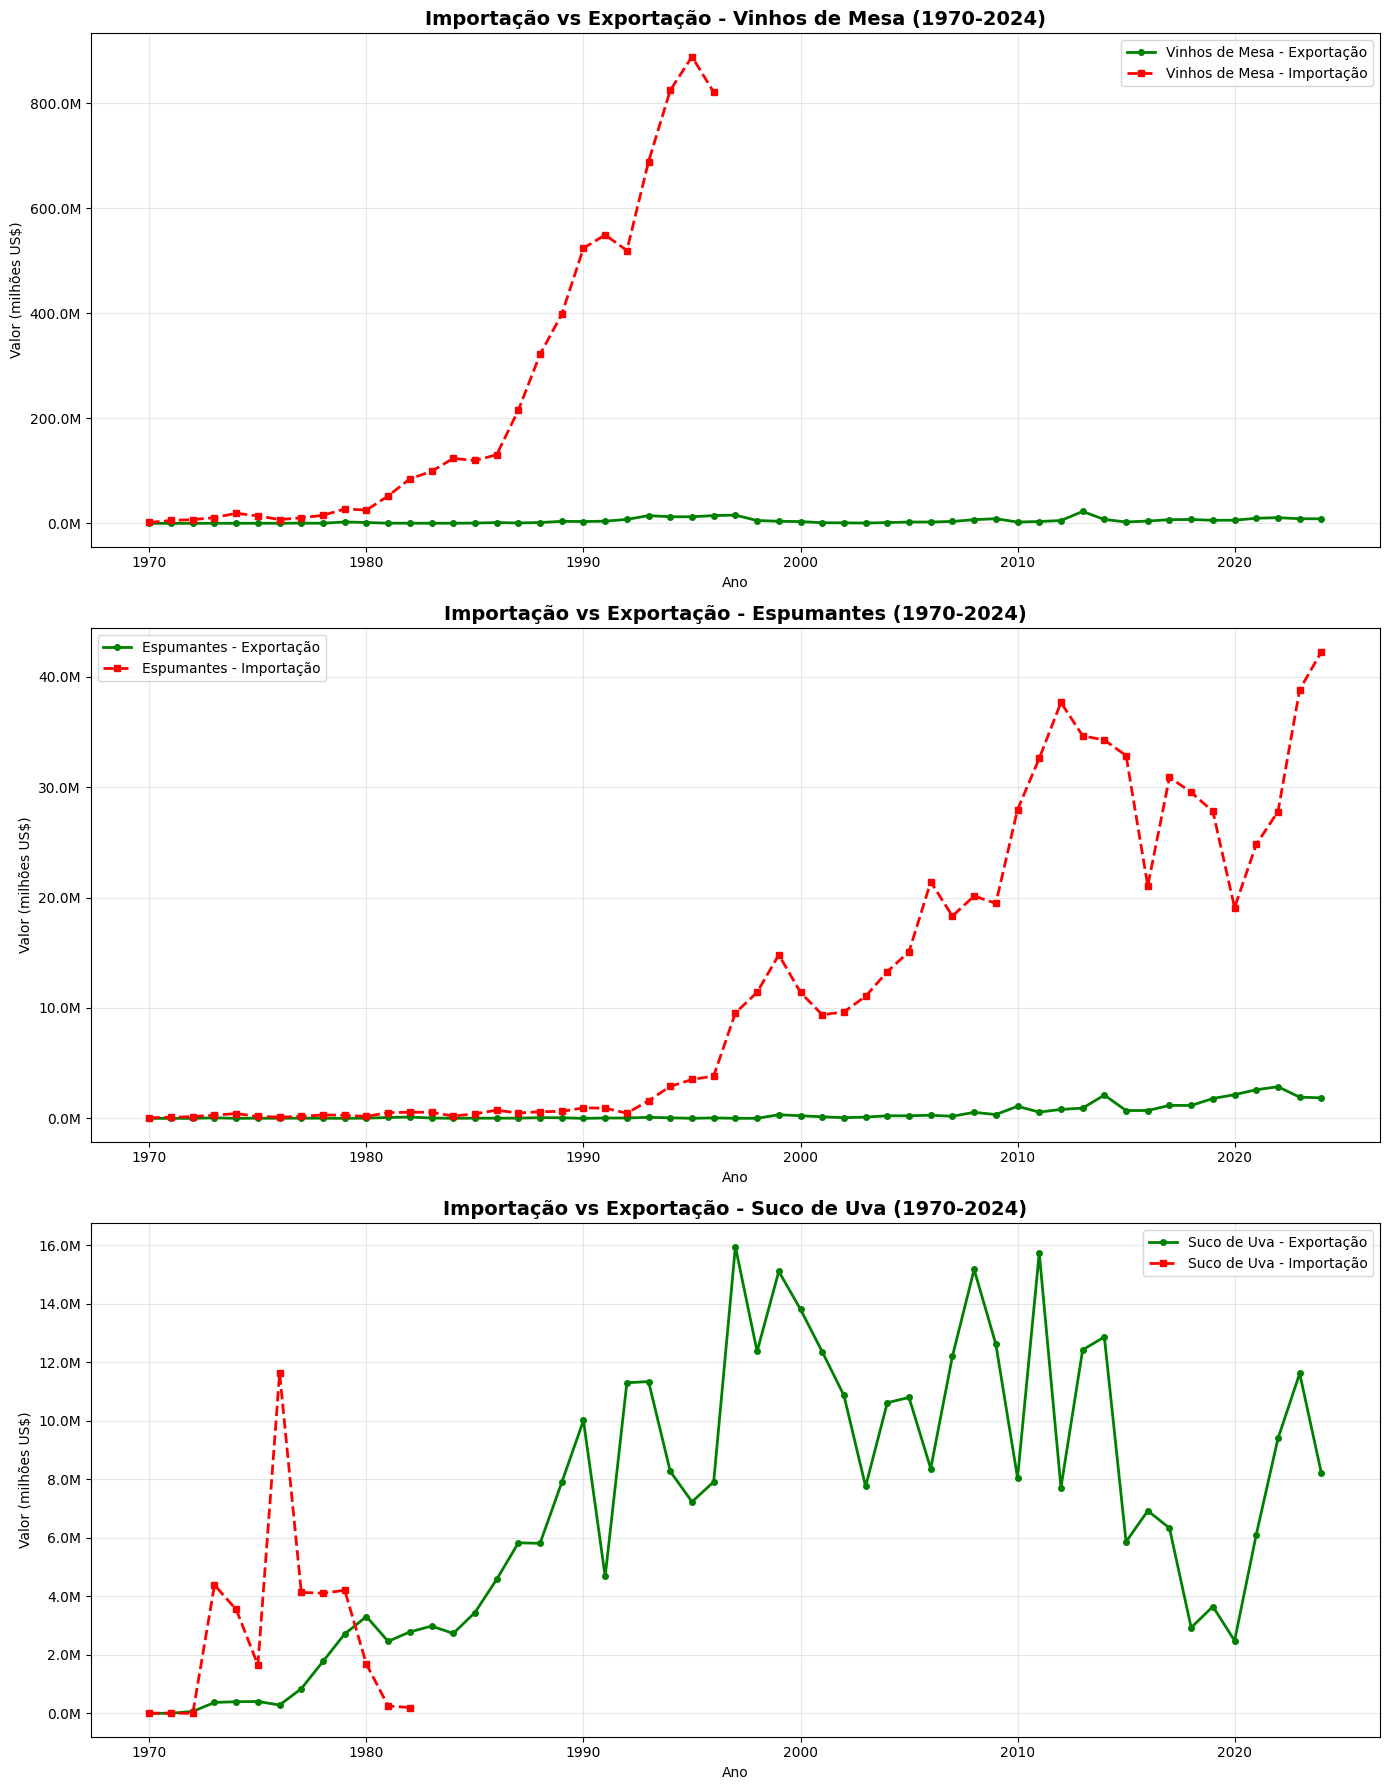

In [ ]:
#Comparação Importação vs Exportação
dfs_importacao = {
     'Vinhos de Mesa': df_imp_vinho_final,
     'Espumantes': df_imp_espumantes_final,
     'Suco de Uva': df_imp_suco_final
 }

fig3, axes3 = plotar_comparacao_imp_exp(
     dfs_exportacao,
     dfs_importacao,
     coluna_metrica='Valor',
     tipo_metrica='valor'
 )
plt.show()

# Análise da Produção Nacional

In [ ]:
df_producao.head()

,id,control,produto,1970,1971,1972,1973,1974,1975,1976,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,1,VINHO DE MESA,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,...,196173123,210308560,86319015,255015187,218375636,144629737,124200414,173899995,195031611,169762429
1,2,vm_Tinto,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,...,157776363,169811472,75279191,1365957,188270142,121045115,103916391,146075996,162844214,139320884
2,3,vm_Branco,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,...,37438069,39557250,10727099,217527985,29229970,22032828,19568734,26432799,30198430,27910299
3,4,vm_Rosado,Rosado,42236152,31970782,26960004,27877426,43192093,31685568,24333795,...,958691,939838,312725,36121245,875524,1551794,715289,1391200,1988968,2531246
4,5,VINHO FINO DE MESA (VINIFERA),VINHO FINO DE MESA (VINIFERA),23899346,23586062,21078771,12368410,31644124,39424590,34500590,...,38464314,37148982,18070626,44537870,38707220,37615422,32516686,43474998,47511796,46268556


In [ ]:
# Função para criar a coluna de tipo
def criar_coluna_tipo(df):

    df_copy = df.copy()

    # Identificar categorias principais e subcategorias
    df_copy['tipo'] = df_copy['control'].apply(lambda x:
        'subcategoria' if '_' in str(x) else 'categoria_principal')

    # Criar coluna para identificar a categoria pai
    df_copy['categoria_pai'] = df_copy['control'].apply(lambda x:
        str(x).split('_')[0] if '_' in str(x) else str(x))

    return df_copy

# Aplicar categorização
df_producao_categorizado = criar_coluna_tipo(df_producao)


# Transforma colunas em anos usando Melt
def transformar_producao_com_melt(df):

    # Identificar colunas de anos
    colunas_anos = [col for col in df.columns if str(col).isdigit()]
    print(f"Colunas de anos identificadas: {colunas_anos}")
    print(f"Total de anos: {len(colunas_anos)}")

    # Colunas que devem ser mantidas como identificadores
    id_vars = ['id', 'control', 'produto', 'tipo', 'categoria_pai']

    # Verificar se todas as colunas ID existem
    id_vars_existentes = [col for col in id_vars if col in df.columns]
    print(f"Colunas ID disponíveis: {id_vars_existentes}")

    # Aplicar melt
    df_melted = pd.melt(df,
                       id_vars=id_vars_existentes,
                       value_vars=colunas_anos,
                       var_name='ano',
                       value_name='quantidade')

    # Converter ano para inteiro
    df_melted['ano'] = df_melted['ano'].astype(int)

    # Tratar valores nulos
    df_melted['quantidade'] = pd.to_numeric(df_melted['quantidade'], errors='coerce')

    # Remover linhas com valores nulos se necessário
    linhas_antes = len(df_melted)
    df_melted = df_melted.dropna(subset=['quantidade'])
    linhas_depois = len(df_melted)

    if linhas_antes != linhas_depois:
        print(f"Removidas {linhas_antes - linhas_depois} linhas com valores nulos")

    # Ordenar por control e ano
    df_melted = df_melted.sort_values(['control', 'ano']).reset_index(drop=True)

    return df_melted, colunas_anos

# Aplicar transformação com melt
df_producao_melted, colunas_anos = transformar_producao_com_melt(df_producao_categorizado)
df_producao_melted.head()


Colunas de anos identificadas: ['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
Total de anos: 54
Colunas ID disponíveis: ['id', 'control', 'produto', 'tipo', 'categoria_pai']


,id,control,produto,tipo,categoria_pai,ano,quantidade
0,15,DERIVADOS,DERIVADOS,categoria_principal,DERIVADOS,1970,14164329
1,15,DERIVADOS,DERIVADOS,categoria_principal,DERIVADOS,1971,13280518
2,15,DERIVADOS,DERIVADOS,categoria_principal,DERIVADOS,1972,12314509
3,15,DERIVADOS,DERIVADOS,categoria_principal,DERIVADOS,1973,28317919
4,15,DERIVADOS,DERIVADOS,categoria_principal,DERIVADOS,1974,47904934


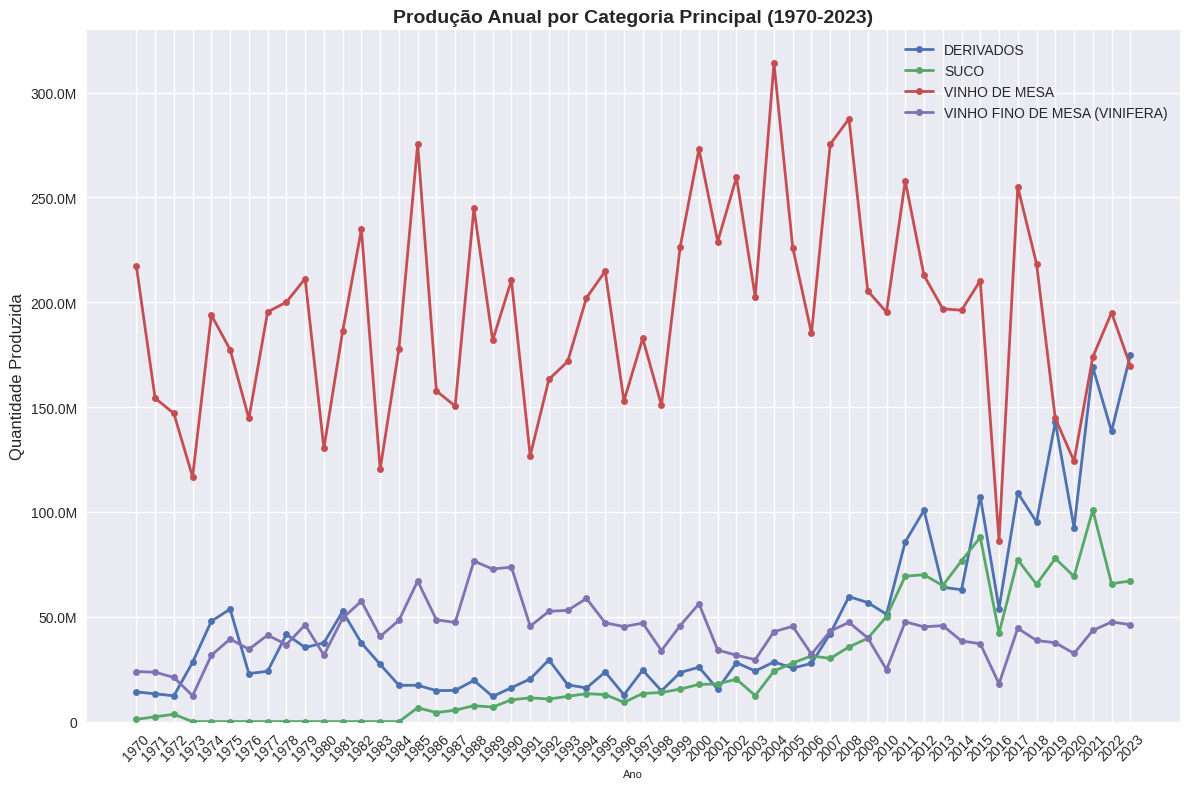

In [ ]:
df = pd.DataFrame(df_producao_melted)

# Filtrar apenas as categorias principais
df_categorias_principais = df[df['tipo'] == 'categoria_principal']

# Agrupar por ano e categoria
df_agrupado = df_categorias_principais.groupby(['ano', 'categoria_pai'])['quantidade'].sum().reset_index()

# Pivotar os dados
df_pivot = df_agrupado.pivot(index='ano', columns='categoria_pai', values='quantidade')

# Função para formatar valores no eixo Y
def formato_milhoes(x, pos):
    if x >= 1000000:
        return f'{x/1000000:.1f}M'
    elif x >= 1000:
        return f'{x/1000:.0f}K'
    else:
        return f'{x:.0f}'

# Criar o gráfico
fig, ax = plt.subplots(figsize=(12, 8))

# Plotar as linhas
for categoria in df_pivot.columns:
    ax.plot(df_pivot.index, df_pivot[categoria],
            marker='o', linewidth=2, markersize=5, label=categoria)

# Configurações
periodo = f"({df_pivot.index.min()}-{df_pivot.index.max()})"
ax.set_title(f"Produção Anual por Categoria Principal {periodo}",
            fontsize=14, fontweight='bold')
ax.set_xlabel("Ano", fontsize=8)
ax.set_ylabel("Quantidade Produzida", fontsize=12)
ax.legend(loc='best')
#ax.grid(True, alpha=0.3)
ax.yaxis.set_major_formatter(plt.FuncFormatter(formato_milhoes))
ax.set_ylim(bottom=0)


# Configurar eixo X
ax.set_xticks(df_pivot.index)
ax.tick_params(axis='x', rotation=45)

# Ajustar layout
plt.tight_layout()

# Mostrar gráfico
plt.show()

# Análise do CLima

# Análise Último Ano

In [ ]:
# Calculando qtd total exportada no período mais recente
top_exp_recente_vinho = df_exp_vinho_final.groupby('Ano')['Quantidade'].sum().sort_values(ascending=False).head(1)
top_exp_recente_espumantes = df_exp_espumantes_final.groupby('Ano')['Quantidade'].sum().sort_values(ascending=False).head(1)
top_exp_recente_suco = df_exp_suco_final.groupby('Ano')['Quantidade'].sum().sort_values(ascending=False).head(1)

In [ ]:
print(top_exp_recente_espumantes)

Ano
2021    935243
Name: Quantidade, dtype: int64


In [ ]:
def obter_dados_2024(df, ano=2024, coluna_metrica='Quantidade'):

    dados_ano = df[df['Ano'] == ano][coluna_metrica].sum()
    return dados_ano

exp_2024_vinho = obter_dados_2024(df_exp_vinho_final, ano=2024, coluna_metrica='Quantidade')
exp_2024_espumantes = obter_dados_2024(df_exp_espumantes_final, ano=2024, coluna_metrica='Quantidade')
exp_2024_suco = obter_dados_2024(df_exp_suco_final, ano=2024, coluna_metrica='Quantidade')

print(f"Exportação 2024:")
print(f"Vinhos de Mesa: {exp_2024_vinho:,.0f} Kg")
print(f"Espumantes: {exp_2024_espumantes:,.0f} Kg")
print(f"Suco de Uva: {exp_2024_suco:,.0f} Kg")


def plotar_comparacao_produtos_ano(dfs_dict, ano=2024, coluna_metrica='Quantidade',
                                  tipo_metrica='quantidade', tipo_operacao='exportacao',
                                  figsize=(8, 6), cores=None):

    # Cores padrão
    if cores is None:
        cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

    # Coleta dados para o ano específico
    produtos = []
    valores = []

    for produto, df in dfs_dict.items():
        valor_ano = df[df['Ano'] == ano][coluna_metrica].sum()
        produtos.append(produto)
        valores.append(valor_ano)

    # Cria DataFrame para facilitar manipulação
    df_resultado = pd.DataFrame({
        'Produto': produtos,
        'Valor': valores
    }).sort_values('Valor', ascending=False)

    # Define configurações baseadas no tipo
    if tipo_metrica == 'quantidade':
        ylabel = "Quantidade Exportada (milhões L)"
        formato_func = lambda x, _: f'{x*1e-6:.1f}M'
        valor_formatado = [f'{v*1e-6:.1f}M' for v in df_resultado['Valor']]
    elif tipo_metrica == 'valor':
        ylabel = "Valor Exportado (milhões US$)"
        formato_func = lambda x, _: f'{x*1e-6:.1f}M'
        valor_formatado = [f'{v*1e-6:.1f}M' for v in df_resultado['Valor']]
    else:
        ylabel = coluna_metrica
        formato_func = lambda x, _: f'{x:.0f}'
        valor_formatado = [f'{v:,.0f}' for v in df_resultado['Valor']]

    # Cria o gráfico
    fig, ax = plt.subplots(figsize=figsize)

    bars = ax.bar(df_resultado['Produto'], df_resultado['Valor'],
                  color=cores[:len(produtos)], alpha=0.8, edgecolor='black', linewidth=1)

    # Adiciona valores no topo das barras
    for i, (bar, valor) in enumerate(zip(bars, valor_formatado)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                valor, ha='center', va='bottom', fontweight='bold', fontsize=10)

    # Configurações do gráfico
    titulo = f"{tipo_operacao.title()} por Produto em {ano}"
    ax.set_title(titulo, fontsize=16, fontweight='bold', pad=20)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel("Produtos", fontsize=12)

    # Formatação do eixo Y
    ax.yaxis.set_major_formatter(plt.FuncFormatter(formato_func))

    # Grade sutil
    ax.grid(True, alpha=0.3, axis='y')

    # Ajusta layout
    plt.tight_layout()

    return fig, ax, df_resultado

Exportação 2024:
Vinhos de Mesa: 5,324,465 Kg
Espumantes: 459,175 Kg
Suco de Uva: 3,457,556 Kg


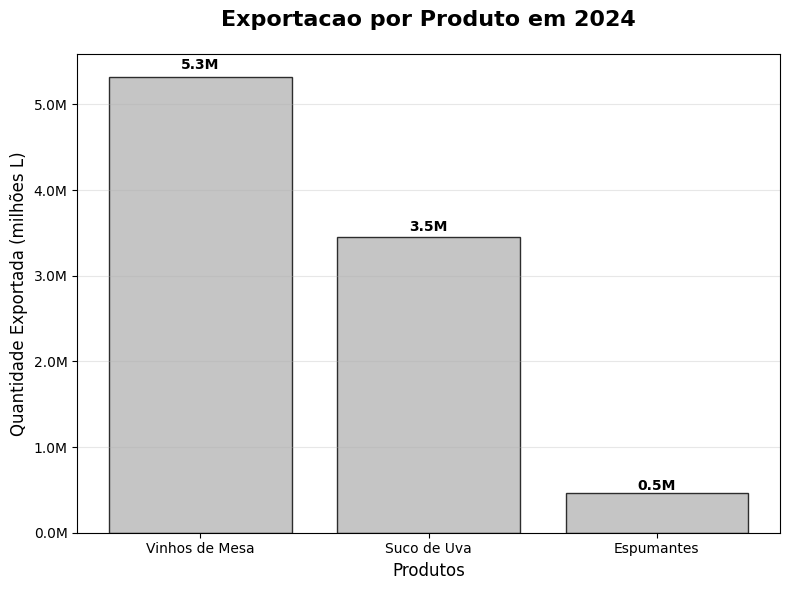

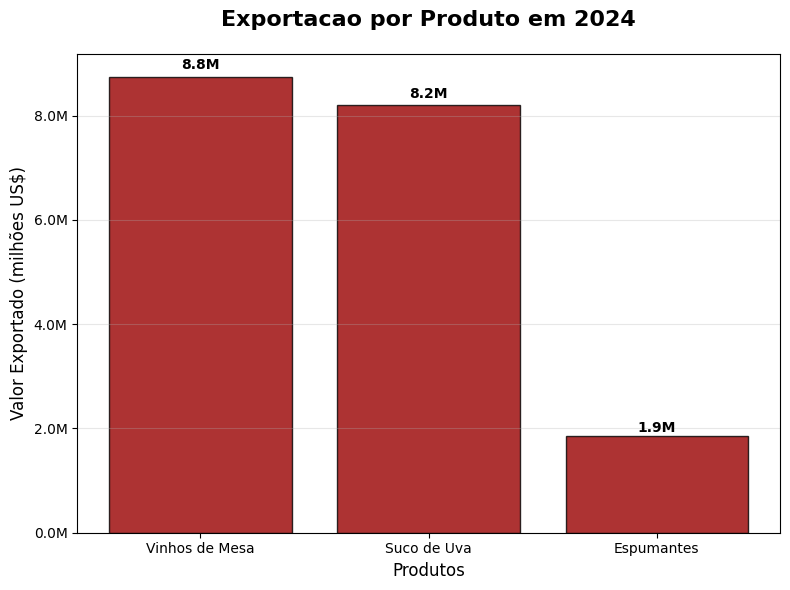

In [ ]:
dfs_exportacao = {
    'Vinhos de Mesa': df_exp_vinho_final,
    'Espumantes': df_exp_espumantes_final,
    'Suco de Uva': df_exp_suco_final
}

# Gráfico de colunas para 2024 - QUANTIDADE
fig1, ax1, dados1 = plotar_comparacao_produtos_ano(
    dfs_exportacao,
    ano=2024,
    coluna_metrica='Quantidade',
    tipo_metrica='quantidade',
    cores=['#b7b7b7ff']
)
plt.show()

# Gráfico de colunas para 2024 - VALOR
fig2, ax2, dados2 = plotar_comparacao_produtos_ano(
    dfs_exportacao,
    ano=2024,
    coluna_metrica='Valor',
    tipo_metrica='valor',
    cores=['#990000ff']
)
plt.show()